In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

**Mô tả dữ liệu**

---

Bộ dữ liệu này bao gồm các đặc điểm liên quan đến sở thích mua sắm của khách hàng, thu thập thông tin cần thiết cho các doanh nghiệp mong muốn nâng cao sự hiểu biết về cơ sở khách hàng của họ. Với một bộ dữ liệu gồm 3900 bản ghi, bộ dữ liệu này là nền tảng cho các doanh nghiệp mong muốn áp dụng những hiểu biết dựa trên dữ liệu để ra quyết định tốt hơn và chiến lược tập trung vào khách hàng.

1. Customer ID: Định danh duy nhất cho mỗi khách hàng.
2. Age: Tuổi của khách hàng.
3. Gender: Giới tính của khách hàng (Nam/Nữ).
4. Item Purchased: Mặt hàng được mua bởi khách hàng.
5. Category: Danh mục của mặt hàng đã mua.
6. Purchase Amount (USD): Số tiền của giao dịch mua hàng
7. Location: Địa điểm mà giao dịch mua hàng được thực hiện.
8. Size: Kích cỡ của mặt hàng đã mua.
9. Color: Màu sắc của mặt hàng đã mua.
10. Season: Mùa trong đó giao dịch mua hàng được thực hiện.
11. Review Rating: Điểm đánh giá từ khách hàng cho mặt hàng đã mua.
12. Subscription Status: Chỉ ra liệu khách hàng có đăng ký (Có/Không).
13. Payment Method: Phương thức thanh toán của khách hàng.
14. Shipping Type: Loại vận chuyển được chọn bởi khách hàng.
15. Discount Applied:  Chỉ ra liệu có áp dụng giảm giá cho giao dịch mua hàng hay không (Có/Không).
16. Promo Code Used: Chỉ ra liệu có sử dụng mã khuyến mãi cho giao dịch mua hàng hay không (Có/Không).
17. Previous Purchases:  Số lần mua hàng trước đó của khách hàng.
18. Preferred Payment Method: Phương thức thanh toán ưa thích của khách hàng.
19. Frequency of Purchases: Tần suất mà khách hàng thực hiện các giao dịch mua hàng (ví dụ: Hàng tuần, Hàng hai tuần, Hàng tháng).

In [3]:
df6 = pd.read_csv(r'datafake\60000.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Chia dữ liệu thành train set và test set
X = df6.drop('Frequency of Purchases', axis=1)
y = df6['Frequency of Purchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và fit mô hình Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên test set
y_pred = rf_model.predict(X_test)

# Đánh giá mô hình bằng cách tính RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.6279126575357578


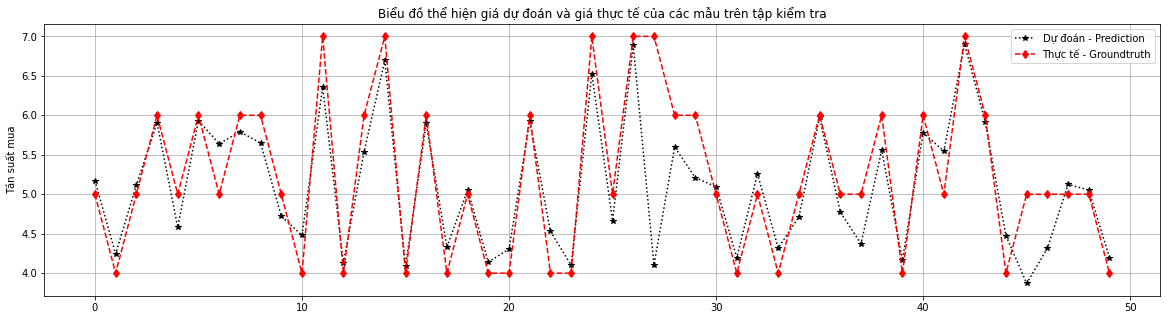

In [6]:
import matplotlib.pyplot as plt

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(20, 5))

# Vẽ dự đoán và kết quả thực tế
plt.plot(y_pred[:50], marker='*', color='black', linestyle=':', label='Dự đoán - Prediction')
plt.plot(y_test.values[:50], marker='d', color='red', linestyle='--', label='Thực tế - Groundtruth')

# Thiết lập tiêu đề và nhãn cho biểu đồ
plt.title('Biểu đồ thể hiện giá dự đoán và giá thực tế của các mẫu trên tập kiểm tra')
plt.ylabel("Tần suất mua")
plt.legend()
plt.grid()


# Hiển thị biểu đồ
plt.show()